
<div style="direction:rtl; text-align:right">

# Can you predict the classification of numbers

<div style="direction:rtl; text-align:right">. We'll dive into the basics of building models and to do that we'll use number data to classify numbers from 0 to 9 based only on pictures! In this project, we will work on the following CAQL data:

- https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# read data

<div style="direction:rtl; text-align:right">We will first read the data. As mentioned, the data are 28 x 28 pixel images. So we expect to see 28 * 28 = 784 columns. Each column contains the pixel value.

In [2]:
train_data = pd.read_csv('digit-recognizer/train.csv')

<div style="direction:rtl; text-align:right">
Let's see what the columns look like:

In [3]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

<div style="direction:rtl; text-align:right">
Here we do the same with test data:

In [4]:
test_data = pd.read_csv('digit-recognizer/test.csv')

In [5]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

<div style="direction:rtl; text-align:right">We will now isolate the variable that contains the number classification for later use in data modeling:

In [6]:
y = train_data['label']

In [7]:
train_data.drop(columns='label', inplace=True)

<div style="direction:rtl; text-align:right">We have 70,000 examples and 784 prediction variables. The prediction variables here are nothing but the pixel values in the written number images (28 pixel x 28 pixel). To show some examples we will use the following command:

In [8]:
def show_examples(data, y):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        select = np.random.randint(data.shape[0])
        plt.imshow(data.values[select,:].reshape(28,28), interpolation='nearest', cmap='gray')
        plt.title('Label: ' + str(y.values[select]))
        plt.axis('off')

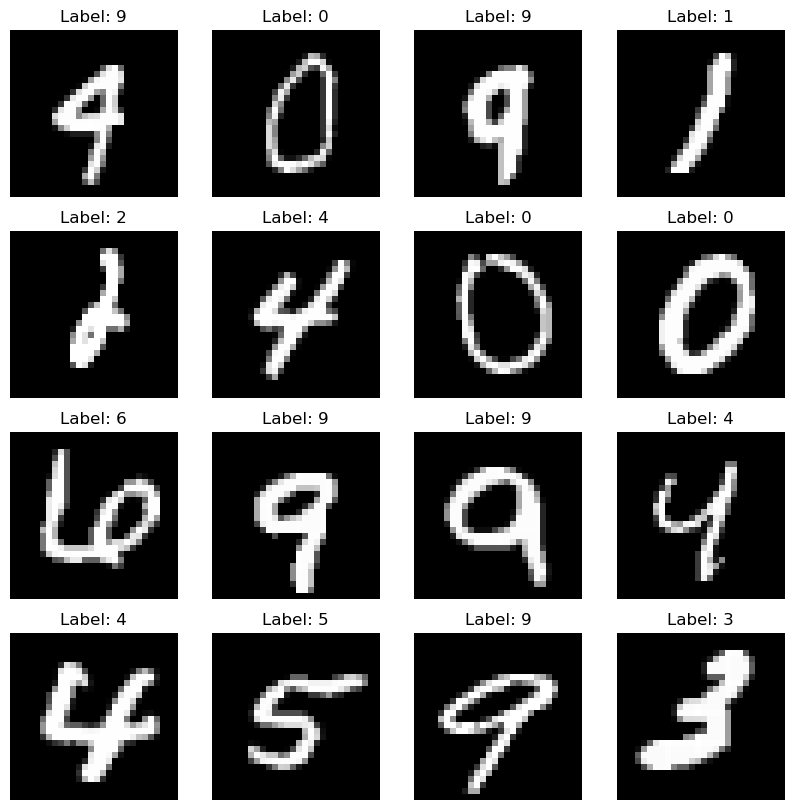

In [9]:
show_examples(train_data, y)

<div style="direction:rtl; text-align:right">

# Data processing

<div style="direction:rtl; text-align:right">At first, we don't have much to do with processing the data except for a step that might be important for some models: normalizing the data. In normalizing data, we simply make all columns the same level so that we can compare different columns. There are many ways to normalize the data, but here we will use the easiest method, which is to divide each column by the largest value, in order to make the data between 0 and 1.

In [10]:


def scale_data(data):
    scaled=data/data.max()
    return scaled


In [11]:
train_data_scaled = scale_data(train_data)


<div style="direction:rtl; text-align:right">If the steps work correctly, we will see a lot of missing values (NaN) but in reality these are not missing values but rather undefined numbers due to dividing a group of zeros by zero. Therefore, we will replace each missing value (NaN) with 0.

In [12]:


train_data_scaled.fillna(0, inplace=True)

<div style="direction:rtl; text-align:right">
We will now apply the normalization to the test data.

In [13]:
test_data_scaled = scale_data(test_data)

<div style="direction:rtl; text-align:right">
We replace the missing values with 0 as we did with the training data.

In [14]:


test_data_scaled.fillna(0, inplace=True)

In [15]:
assert np.max(np.max(train_data_scaled)) == 1., 'You got something wrong!'

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


<div style="direction:rtl; text-align:right">We will plot the data before and after settlement to note the difference between them. Below is the drawing of the data before settlement

Text(0, 0.5, 'Frequency')

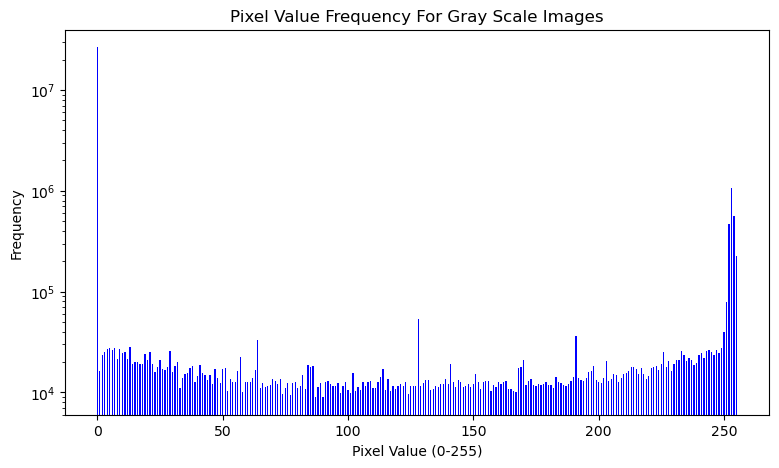

In [16]:
# We will use the train_data variable
y1 = pd.value_counts(train_data.values.ravel()).sort_index()
x1 = y1.index
width = 0.5
plt.figure(figsize=[20,5])
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x1, y1, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

<div style="direction:rtl; text-align:right">Plot the data after normalization to notice the difference between the data before and after the normalization, use an appropriate size for the value of the column width (width) so that the values are between 0.01 to 0.0001, try it and choose an appropriate width and do not forget to change the title of the graph to be Pixel Value Frequency For Gray Scale Images After Scalling Note that the values of the X-axis will range from 0 to 1, so we will change the address of the X-axis to be Pixel Value (0-1)

Text(0, 0.5, 'Frequency')

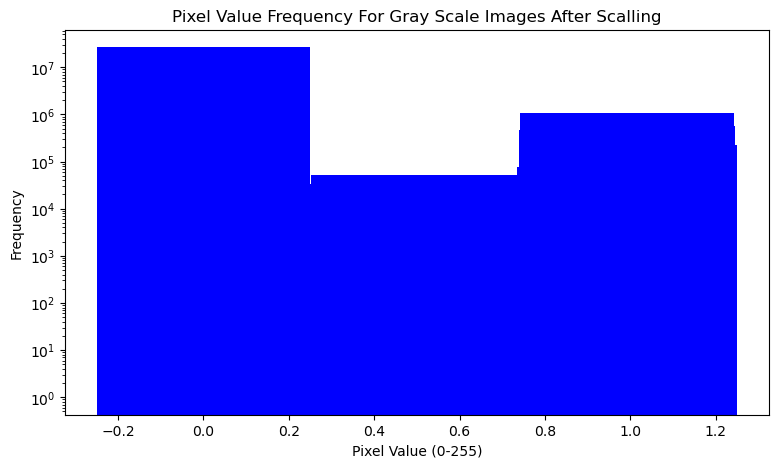

In [17]:
# Use the train_data_scaled variable
y1 = pd.value_counts(train_data_scaled.values.ravel()).sort_index()
x1 = y1.index
width = 0.5
plt.figure(figsize=[20,5])
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x1, y1, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images After Scalling')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

<div style="direction:rtl; text-align:right">

# Data modeling

<div style="direction:rtl; text-align:right">We will now model the data using several models and see how we can improve the performance of the model. Specifically, we will train the model using the raw data (training_data) and then using the normalized data (training_data_scaled) and compare the two results to see if the normalization has any role in improving the performance of the model. Let's start with logistic regression. In the box below, import both the algorithm library and the cross_val_score command and use them to train and validate the model.

In [18]:


# HINT: You should use `train_data` as your input

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

model1 = MultinomialNB()
model1.fit(train_data,y)
scores = cross_val_score(model1, train_data, y, cv=3)

<div style="direction:rtl; text-align:right">
Now we'll print the average resolution:

In [19]:
scores.mean()

0.8252380952380953

<div style="direction:rtl; text-align:right">Now we will repeat the same process but using another template of your choice. Find a classification model from the scikit-learn libraries and use it to classify numbers. Note: You can use train_data_scaled instead of raw data and compare the performance of different models.
1
​

In [20]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model2 = LogisticRegression()
model2.fit(train_data_scaled,y)
scores =  cross_val_score(model2, train_data_scaled, y, cv=3)
scores.mean()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.9162857142857144

<div style="direction:rtl; text-align:right">
Let's compare the confusion matrix for the two cases and see if the two models make the same errors.

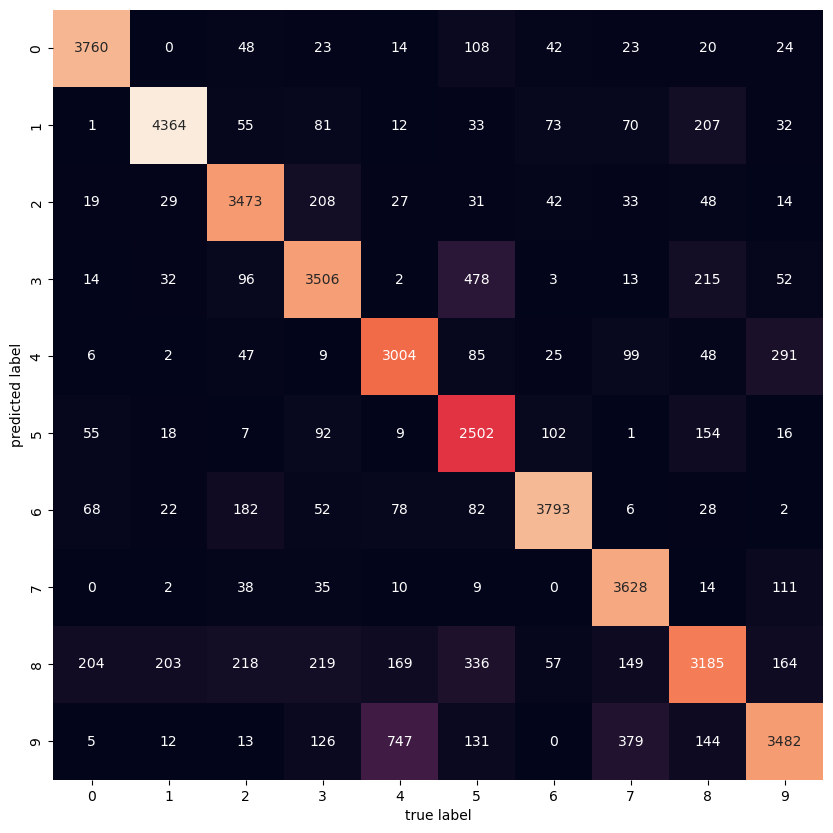

In [21]:
# confusion matrix 1

model1.fit(train_data, y)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, model1.predict(train_data))

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<div style="direction:rtl; text-align:right">
Don't forget to use the training data after normalization if you used it to train the second model.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


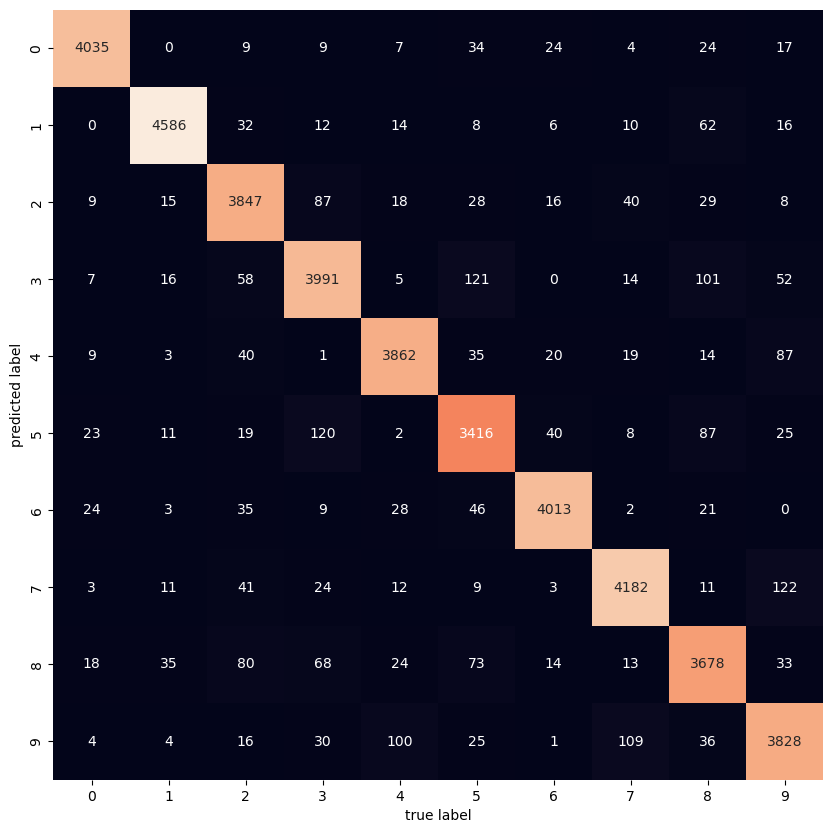

In [22]:

# confusion matrix 2

model2.fit(train_data_scaled, y)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, model2.predict(train_data_scaled))

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
model1.fit(train_data, y) # training model on full data

MultinomialNB()

In [24]:
test_data['Label'] = model1.predict(test_data)

In [25]:
test_data.index.name = 'ImageId'

In [26]:
test_data.index = test_data.index +1

In [27]:
test_data['Label'].to_csv('./digits_submission.csv', header=True)